In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
%matplotlib inline
ipos = pd.read_csv(r'ipo_data.csv',encoding='latin-1')

In [2]:
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else
x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else
x.replace('%',''))
ipos = ipos.applymap(lambda x: x if not '(' in str(x) else
x.replace('(',''))
ipos = ipos.applymap(lambda x: x if not ')' in str(x) else
x.replace(')',''))
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,1/13/17,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,1,NaN
1,1/20/17,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,1,NaN
2,1/20/17,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,3,NaN
3,1/26/17,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,2,NaN
4,1/26/17,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,1.71,3.35,2,Missed
5,1/27/17,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,15.00,14.18,14.33,-4.47,0.82,0.67,1,NaN
6,1/27/17,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,23.00,25.32,26.12,13.57,2.32,3.12,3,NaN
7,1/27/17,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,16.00,18.00,17.25,7.81,2.00,1.25,2,NaN
8,1/27/17,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,22.00,25.75,25.00,13.64,3.75,3.00,2,NaN
9,2/1/17,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,20.00,20.15,20.00,0.00,0.15,0.00,2,Missed


In [3]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 12 columns):
Date                       2554 non-null object
Issuer                     2554 non-null object
Symbol                     2554 non-null object
Lead/Joint-Lead Manager    2554 non-null object
Offer Price                2554 non-null object
Opening Price              2554 non-null object
1st Day Close              2554 non-null object
1st Day % Px Chng          2554 non-null object
$ Chg Opening              2554 non-null object
$ Chg Close                2554 non-null object
Star Ratings               2554 non-null object
Performed                  286 non-null object
dtypes: object(12)
memory usage: 239.5+ KB


In [4]:
ipos[ipos['Date']=='11/120']

ipos.loc[1103, 'Date'] = pd.to_datetime('2012-11-20')

In [5]:
ipos['Date'] = pd.to_datetime(ipos.Date)
# ipos = ipos.sort_values('Date').reset_index(drop=True)

In [6]:
ipos.replace('N/C',0, inplace=True)
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float')
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

In [7]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 12 columns):
Date                       2554 non-null datetime64[ns]
Issuer                     2554 non-null object
Symbol                     2554 non-null object
Lead/Joint-Lead Manager    2554 non-null object
Offer Price                2554 non-null float64
Opening Price              2554 non-null float64
1st Day Close              2554 non-null float64
1st Day % Px Chng          2554 non-null float64
$ Chg Opening              2554 non-null float64
$ Chg Close                2554 non-null float64
Star Ratings               2554 non-null int64
Performed                  286 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 239.5+ KB


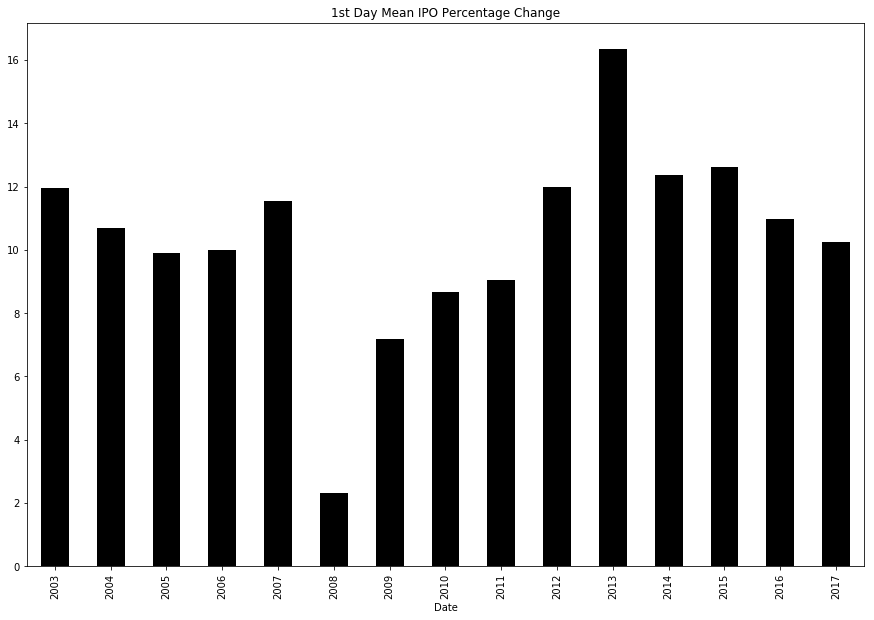

In [8]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng']\
.mean().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Mean IPO Percentage Change')

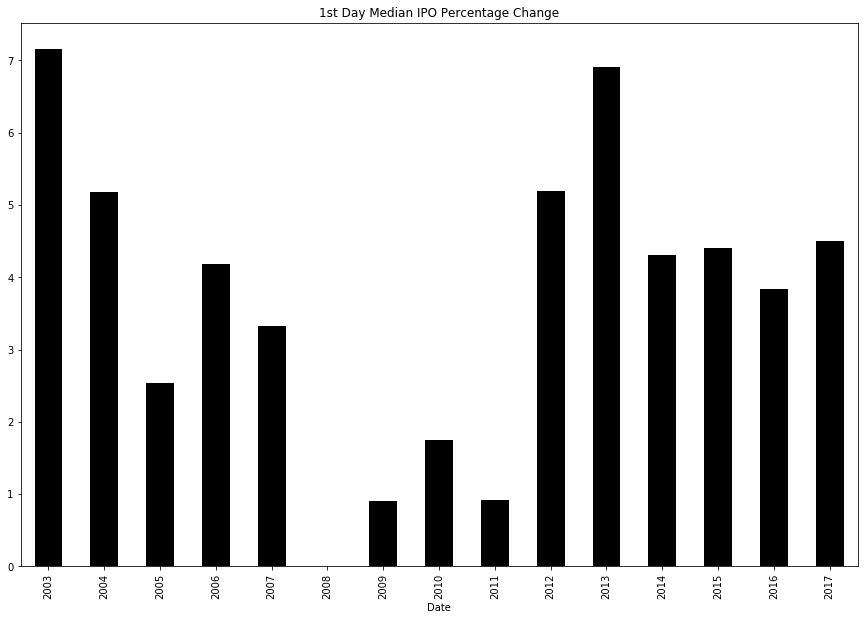

In [9]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng']\
.median().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Median IPO Percentage Change')

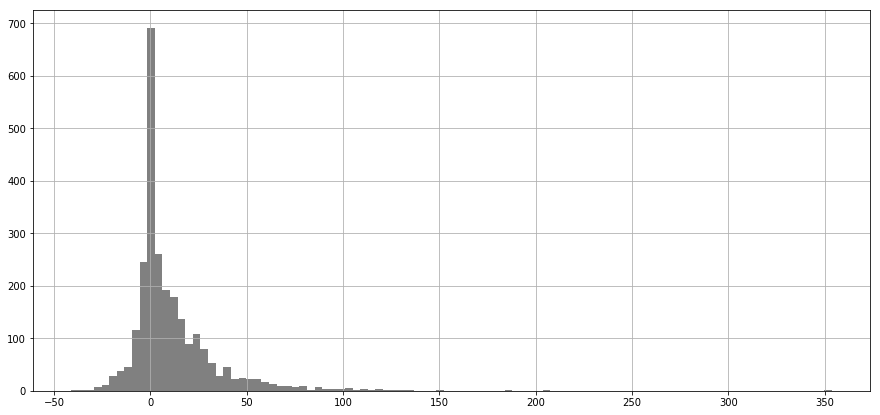

In [10]:
ipos['1st Day % Px Chng'].hist(figsize=(15,7), bins=100, color='grey')

In [11]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [12]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,1,NaN,0.09,0.885827
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,1,NaN,-0.05,-0.495050
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,3,NaN,-0.53,-2.389540
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,2,NaN,1.00,6.250000
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,1.71,3.35,2,Missed,1.64,12.340105
5,2017-01-27,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,15.00,14.18,14.33,-4.47,0.82,0.67,1,NaN,-0.15,-1.057828
6,2017-01-27,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,23.00,25.32,26.12,13.57,2.32,3.12,3,NaN,0.80,3.159558
7,2017-01-27,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,16.00,18.00,17.25,7.81,2.00,1.25,2,NaN,-0.75,-4.166667
8,2017-01-27,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,22.00,25.75,25.00,13.64,3.75,3.00,2,NaN,-0.75,-2.912621
9,2017-02-01,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,20.00,20.15,20.00,0.00,0.15,0.00,2,Missed,-0.15,-0.744417


In [13]:
ipos['% Chg Open to Close'].describe()

count    2554.000000
mean        2.321903
std         9.142737
min      -106.601942
25%        -1.135719
50%         0.752358
75%         5.000000
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [14]:
ipos[ipos['% Chg Open to Close']<-98]

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
445,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.0,5.15,13.36,11.33,6.85,1.36,1,NaN,-5.49,-106.601942
2062,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,6.22,0.22,1,NaN,-6.00,-98.522167


In [15]:
ipos[ipos['Date']>='2017-01-01']['$ Chg Open to Close'].describe()

count    186.000000
mean       0.338172
std        1.490686
min       -5.320000
25%       -0.250000
50%        0.010000
75%        0.747500
max        7.720000
Name: $ Chg Open to Close, dtype: float64

In [16]:
# ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
# ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [17]:
# ipos['% Chg Open to Close'].describe()

In [18]:
ipos[ipos['Date']>='2017-01-01']['$ Chg Open to Close'].sum()

62.899999999999999

In [19]:
ipos[(ipos['Date']>='2017-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    96.000000
mean      1.181875
std       1.500900
min       0.010000
25%       0.165000
50%       0.705000
75%       1.750000
max       7.720000
Name: $ Chg Open to Close, dtype: float64

In [20]:
sp = pd.read_csv('GSPC.csv')
sp.sort_values('Date', inplace=True)
sp.reset_index(drop=True, inplace=True)
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
1,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1438.560059,1014000000
2,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,1432.250000,974600000
3,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1449.680054,1030400000
4,2000-01-14,1449.680054,1473.000000,1449.680054,1465.150024,1465.150024,1085900000
5,2000-01-18,1465.150024,1465.150024,1451.300049,1455.140015,1455.140015,1056700000
6,2000-01-19,1455.140015,1461.390015,1448.680054,1455.900024,1455.900024,1087800000
7,2000-01-20,1455.900024,1465.709961,1438.540039,1445.569946,1445.569946,1100700000
8,2000-01-21,1445.569946,1453.180054,1439.599976,1441.359985,1441.359985,1209800000
9,2000-01-24,1441.359985,1454.089966,1395.420044,1401.530029,1401.530029,1115800000


In [21]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 16
        chg = (sp.iloc[day_ago_idx]['Close'] - \
               sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [22]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error 2015-02-21
error 2015-02-21
error 2013-11-16
error 2009-08-01


In [23]:
ipos[ipos['Date']=='2015-02-21'].index.values

array([351, 352])

In [24]:
ipos[ipos['Date']=='2013-11-16'].index.values

array([932])

In [25]:
ipos[ipos['Date']=='2009-08-01'].index.values

array([1431])

In [26]:
ipos.loc[1431, 'Date'] = pd.to_datetime('2009-08-12')
ipos.loc[932, 'Date'] = pd.to_datetime('2012-11-20')
ipos.loc[351, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[352, 'Date'] = pd.to_datetime('2015-05-21')

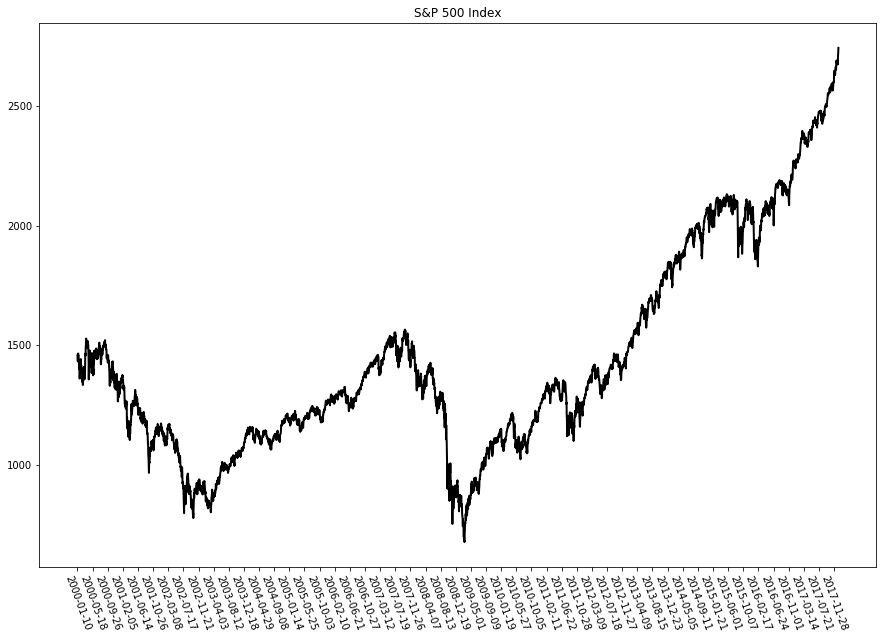

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('S&P 500 Index')
ax.plot(sp['Close'], color='k', linewidth=2)
ax.set_xticks(np.arange(0,len(sp),90));
ax.set_xticklabels([sp['Date'][x] for x in sp[['Date']].index if x % 90 == 0], rotation=-70);

In [28]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

In [29]:
def get_cto_chg(ipo_dt):
    try:
        today_open_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        chg = (sp.iloc[today_open_idx]['Open'] - \
               sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

In [30]:
ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)

In [31]:
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Manager'].map(lambda x: x.split('/')[0])

In [32]:
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

In [33]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

A.G. Edwards
AG Edwards
AG Edwards & Sons
AG Edwrads
Advest
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Anderson & Strudrick
Axiom Capital Management
BB&T Capital Markets
BMO Capital Markets
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Banc of America
Banc of America Securities
Barclay Capital
Barclays
Barclays Capital
Bear Stearns
Bear Streans
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lync
BofA Merrill Lynch
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CIBC Capital Markets
CIBC World Markets
CIBC Worldwide
CRT Capital
CRT Capital Group
CS First Boston
Canaccord Genuity
Cantor Fitzgerald
Cantor Fitzgerald & Co.
Capital Growth Financial
Casimir Capital
Chardan Capital Markets
China Inter'l
China International
Cit
Citi
Citigroup
Cohen
Cohen & Company Capital Markets, LLC   I-Bankers Securities
Cowen
Cowen and Company
Craig-Hallum Capital
Craig-Hallum Capital Group
Credit Su

In [34]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'

ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [35]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

AG Edwards
Advest
Aegis Capital
Anderson & Strudrick
Axiom Capital Management
BB&T Capital Markets
BMO Capital Markets
Banc of America
Barclays
Bear Stearns
BofA Merrill Lync
BofA Merrill Lynch
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CIBC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan Capital Markets
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital
Craig-Hallum Capital Group
DA Davidson
Dawson James Securities
Deutsche Bank
Dougherty & Company
EarlyBirdCapital
FIG Partners
FTN Midwest Securities
Feltl & Co.
Ferris Baker Watts
First Albany
Friedman Billings Ramsey
Gilford Securities
Global Hunter Securities, LLC
Goldman Sachs
Gunn Allen
HCFP Brenner
I-Bankers
Imperial Capital
J.P Morgan
JMP Securities
JP Morgan
JP Turner
Janney Montgomery Scott
Jefferies
Johnson Rice
Keefe, Bruyette & Woods
KeyBanc Capital Markets
LG Investment & Securities
Ladenburg Thalmann
Laidlaw & Company UK Lt

In [36]:
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Manager'].map(lambda x: len(x.split('/')))

In [37]:
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tue', 2:'Wed',\
                                                  3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})

In [38]:
ipos['Month'] = ipos['Date'].map(lambda x: x.month)

In [39]:
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [40]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,1,NaN,0.09,0.885827,-0.014095,0.101304,Deutsche Bank,1,Fri,Jan
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,1,NaN,-0.05,-0.495050,-0.228745,0.276982,Cantor Fitzgerald,1,Fri,Jan
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,3,NaN,-0.53,-2.389540,-0.228745,0.276982,Citigroup,4,Fri,Jan
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,2,NaN,1.00,6.250000,1.795531,0.011302,CSFB,2,Thu,Jan
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,1.71,3.35,2,Missed,1.64,12.340105,1.795531,0.011302,CSFB,3,Thu,Jan
5,2017-01-27,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,15.00,14.18,14.33,-4.47,0.82,0.67,1,NaN,-0.15,-1.057828,1.141910,0.101890,Citigroup,3,Fri,Jan
6,2017-01-27,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,23.00,25.32,26.12,13.57,2.32,3.12,3,NaN,0.80,3.159558,1.141910,0.101890,Barclays,4,Fri,Jan
7,2017-01-27,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,16.00,18.00,17.25,7.81,2.00,1.25,2,NaN,-0.75,-4.166667,1.141910,0.101890,JP Morgan,2,Fri,Jan
8,2017-01-27,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,22.00,25.75,25.00,13.64,3.75,3.00,2,NaN,-0.75,-2.912621,1.141910,0.101890,Goldman Sachs,3,Fri,Jan
9,2017-02-01,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,20.00,20.15,20.00,0.00,0.15,0.00,2,Missed,-0.15,-0.744417,0.439429,0.294882,Deutsche Bank,8,Wed,Feb


In [41]:
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100

In [42]:
ipos['Open to Close Pct'] = (ipos['$ Chg Close'].astype('float') -\
                             ipos['$ Chg Opening'].astype('float'))/\
                             ipos['Opening Price'].astype('float') * 100

In [43]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,...,0.09,0.885827,-0.014095,0.101304,Deutsche Bank,1,Fri,Jan,1.574803,0.885827
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,...,-0.05,-0.495050,-0.228745,0.276982,Cantor Fitzgerald,1,Fri,Jan,0.990099,-0.495050
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,...,-0.53,-2.389540,-0.228745,0.276982,Citigroup,4,Fri,Jan,14.337241,-2.389540
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,...,1.00,6.250000,1.795531,0.011302,CSFB,2,Thu,Jan,6.250000,6.250000
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,1.71,3.35,...,1.64,12.340105,1.795531,0.011302,CSFB,3,Thu,Jan,12.866817,12.340105
5,2017-01-27,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,15.00,14.18,14.33,-4.47,0.82,0.67,...,-0.15,-1.057828,1.141910,0.101890,Citigroup,3,Fri,Jan,5.782793,-1.057828
6,2017-01-27,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,23.00,25.32,26.12,13.57,2.32,3.12,...,0.80,3.159558,1.141910,0.101890,Barclays,4,Fri,Jan,9.162717,3.159558
7,2017-01-27,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,16.00,18.00,17.25,7.81,2.00,1.25,...,-0.75,-4.166667,1.141910,0.101890,JP Morgan,2,Fri,Jan,11.111111,-4.166667
8,2017-01-27,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,22.00,25.75,25.00,13.64,3.75,3.00,...,-0.75,-2.912621,1.141910,0.101890,Goldman Sachs,3,Fri,Jan,14.563107,-2.912621
9,2017-02-01,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,20.00,20.15,20.00,0.00,0.15,0.00,...,-0.15,-0.744417,0.439429,0.294882,Deutsche Bank,8,Wed,Feb,0.744417,-0.744417


In [44]:
ipos.columns

Index(['Date', 'Issuer', 'Symbol', 'Lead/Joint-Lead Manager', 'Offer Price',
       'Opening Price', '1st Day Close', '1st Day % Px Chng', '$ Chg Opening',
       '$ Chg Close', 'Star Ratings', 'Performed', '$ Chg Open to Close',
       '% Chg Open to Close', 'SP Week Change', 'SP Close to Open Chg Pct',
       'Lead Mgr', 'Total Underwriters', 'Week Day', 'Month', 'Gap Open Pct',
       'Open to Close Pct'],
      dtype='object')

In [45]:
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") +\
                  Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +\
                  Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos, return_type='dataframe')

In [46]:
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.574803,0.16,10.00,10.16,0.101304,-0.014095
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.990099,0.10,10.00,10.10,0.276982,-0.228745
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,14.337241,3.18,19.00,22.18,0.276982,-0.228745
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.250000,1.00,15.00,16.00,0.011302,1.795531
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,12.866817,1.71,15.00,13.29,0.011302,1.795531
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,5.782793,0.82,15.00,14.18,0.101890,1.141910
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,9.162717,2.32,23.00,25.32,0.101890,1.141910
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.111111,2.00,16.00,18.00,0.101890,1.141910
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,14.563107,3.75,22.00,25.75,0.101890,1.141910
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.744417,0.15,20.00,20.15,0.294882,0.439429


In [47]:
mask = (ipos['Date'] > "1/1/2017") & (ipos['Date'] <= "12/12/2017")
ipos.loc[mask]

# display(ipos.loc[mask])

# Index of first 2017 IPO is 2368, 2014 is 1900
idx = 181
X_train, X_test = X[idx:], X[:idx]

y_train = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= .25 else 0)

In [48]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
clf.score(X_test, y_test)

0.66298342541436461

In [50]:
ipos[(ipos['Date']>='2017-01-01')]['$ Chg Open to Close'].describe()

count    186.000000
mean       0.338172
std        1.490686
min       -5.320000
25%       -0.250000
50%        0.010000
75%        0.747500
max        7.720000
Name: $ Chg Open to Close, dtype: float64

In [51]:
pred_label = clf.predict(X_test)

In [52]:
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.iloc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

In [59]:
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])

In [60]:
rf[rf['predicted']==1]['$ chg'].sum()

26.469999999999999

In [61]:
ipos[(ipos['Date']>='2017-01-01')]['$ Chg Open to Close'].sum()

62.899999999999999

In [62]:
rf[rf['predicted']==1]['$ chg'].describe()

count    30.000000
mean      0.882333
std       2.229672
min      -2.400000
25%      -0.232500
50%       0.225000
75%       1.767500
max       7.720000
Name: $ chg, dtype: float64

Text(0.5,0,'Index')

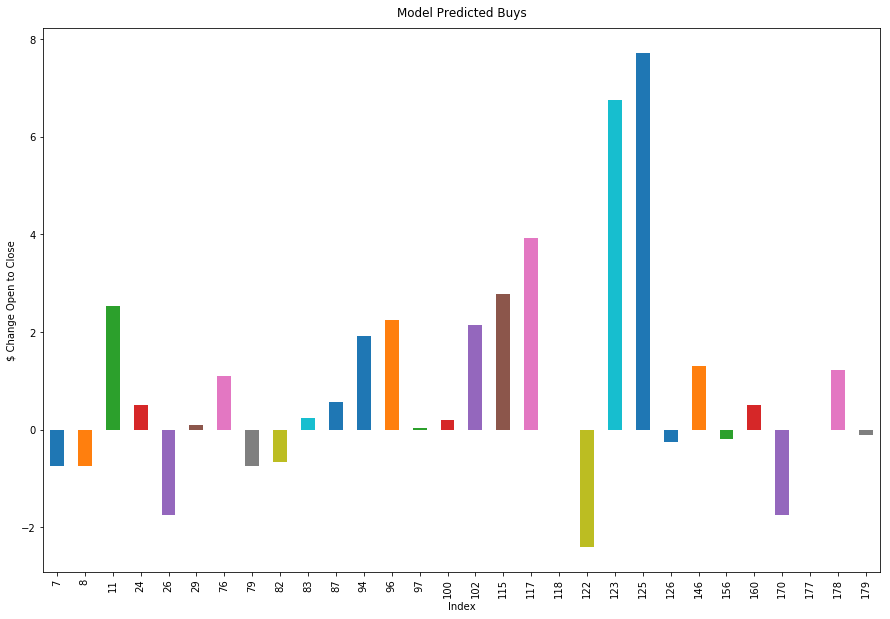

In [63]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [64]:
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,0.999768,"Q(""Lead Mgr"")[T.Wachovia]"
1,0.982165,"Q(""Lead Mgr"")[T.RW Baird]"
2,0.927563,"Q(""Lead Mgr"")[T.Bear Stearns]"
3,0.872653,"Q(""Lead Mgr"")[T.C.E. Unterberg, Towbin]"
4,0.799371,"Q(""Lead Mgr"")[T.China International]"
5,0.680667,"Q(""Lead Mgr"")[T.Merrill Lynch]"
6,0.591836,"Q(""Lead Mgr"")[T.JP Morgan]"
7,0.582337,"Q(""Lead Mgr"")[T.Leerink Partners]"
8,0.575187,"Q(""Lead Mgr"")[T.Imperial Capital]"
9,0.547712,"Q(""Lead Mgr"")[T.Casimir Capital]"


In [65]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.049923,"Q(""Week Day"")[T.Mon]"
13,-0.011961,"Q(""Week Day"")[T.Thu]"
14,-0.101336,"Q(""Week Day"")[T.Tue]"
15,-0.075482,"Q(""Week Day"")[T.Wed]"


In [66]:
ipos[ipos['Lead Mgr'].str.contains('Keegan|Towbin')]

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
1199,2011-06-22,Fidus Investment,FDUS,Morgan Keegan,15.0,14.75,15.00,0.00,0.25,0.00,...,-0.25,-1.694915,-3.693126,-0.003091,Morgan Keegan,1,Wed,Jun,1.694915,-1.694915
1550,2007-02-26,Rosetta Genomics,ROSG,"C.E. Unterberg, Towbin",7.0,7.02,7.32,4.57,0.02,0.32,...,0.30,4.273504,0.363086,-0.010330,"C.E. Unterberg, Towbin",1,Mon,Feb,0.284900,4.273504
2140,2005-08-04,Advanced Life Sciences,ADLS,"C.E. Unterberg, Towbin/ThinkEquity Partners",5.0,5.03,6.00,20.00,0.03,1.00,...,0.97,19.284294,1.777992,0.000000,"C.E. Unterberg, Towbin",2,Thu,Aug,0.596421,19.284294


In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
clf_rf = RandomForestClassifier(n_estimators=5000)

In [69]:
model = clf_rf.fit(X_train, y_train)

In [70]:
clf_rf.score(X_test, y_test)

0.64640883977900554

In [71]:
pred_label_rf = model.predict(X_test)

In [73]:
results_rf=[]
for pl, tl, idx, chg in zip(pred_label_rf, y_test, y_test.index, ipos.ilocrf2 = pd.DataFrame(results_rf, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results_rf.append([idx, chg, pl, tl, 1])
    else:
        results_rf.append([idx, chg, pl, tl, 0])

In [74]:
rf2 = pd.DataFrame(results_rf, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])

In [75]:
rf2.sort_values('$ chg', ascending=False)

,index,$ chg,predicted,actual,correct
125,125,7.72,1,1,1
128,128,6.79,0,1,0
123,123,6.75,1,1,1
33,33,6.56,1,1,1
117,117,3.93,1,1,1
19,19,3.20,0,1,0
85,85,2.95,0,1,0
115,115,2.78,0,1,0
43,43,2.61,0,1,0
11,11,2.53,0,1,0


In [76]:
rf2[rf2['predicted']==1]['$ chg'].sum()

27.049999999999997

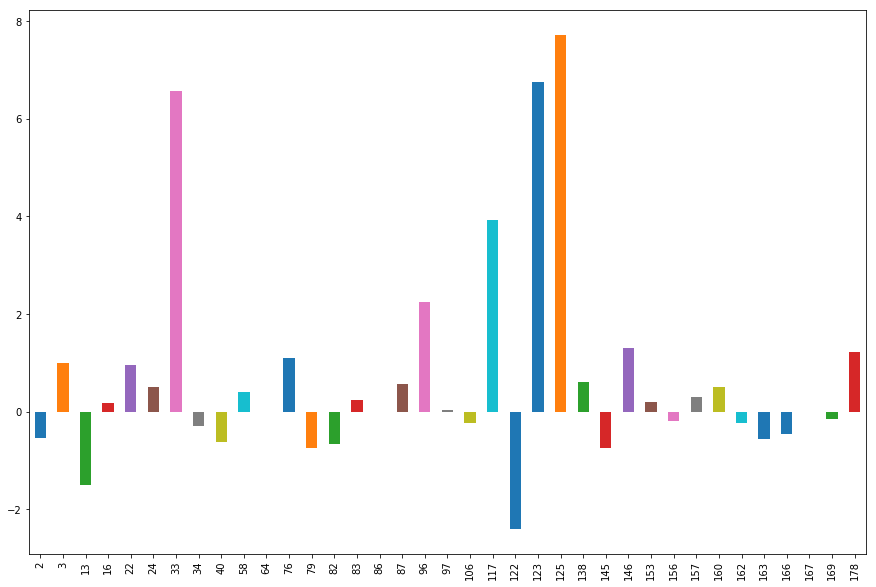

In [77]:
rf2[rf2['predicted']==1]['$ chg'].plot(kind='bar', figsize=(15,10))

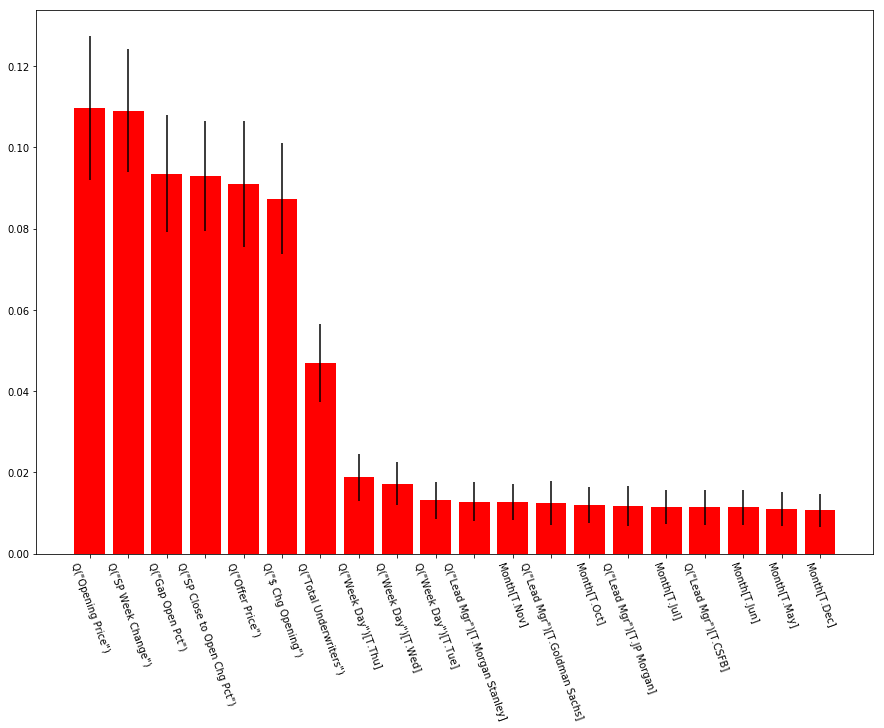

In [78]:
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]

plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);